In [1]:
with open("v4_train_tokenized_sizes.txt") as f:
    lines = f.readlines()

In [3]:
lines = [l.strip() for l in lines]

In [23]:
path_dict = {}
for i, l in enumerate(lines[:-4]):
    parts = l.split(" ")
    size_n = parts[-3]
    size_u = parts[-2]
    lang_file = "/".join(parts[-1].split("/")[-2:])
    path_dict[lang_file] = (size_n, size_u)

In [24]:
len(path_dict)

4535

In [28]:
for key, val in path_dict.items():
    assert val[1] in ["MiB", "KiB", "GiB", "Bytes"], val[1]

In [29]:
multiplier = {
    "GiB": 1,
    "MiB": 1/1024,
    "KiB": 1/(1024*1024),
    "Bytes": 1/(1024*1024*1024)
}

In [32]:
path_size_dict = {}
for key, val in path_dict.items():
    size = float(val[0]) * multiplier[val[1]]
    path_size_dict[key] = size

In [34]:
total = sum([val for _, val in path_size_dict.items()])

In [35]:
total

668.4268590155998

In [36]:
lang_size_dict = {}
for key, val in path_size_dict.items():
    lang  = key.split("/")[0]
    if lang in lang_size_dict:
        lang_size_dict[lang] += val
    else:
        lang_size_dict[lang] = val

In [39]:
lang_size_dict

{'abap': 0.0580078125,
 'actionscript': 0.37919921875,
 'ada': 0.17041015625,
 'agda': 0.06552734375,
 'ags-script': 0.00595703125,
 'alloy': 0.009375,
 'ampl': 4.634857177734375e-05,
 'antlr': 0.0408203125,
 'apacheconf': 0.000142669677734375,
 'api-blueprint': 0.01181640625,
 'apl': 0.00478515625,
 'applescript': 0.005078125,
 'arc': 0.01552734375,
 'arduino': 0.47548828125,
 'asciidoc': 0.60576171875,
 'asp': 0.24052734375,
 'aspectj': 0.00419921875,
 'ats': 0.01162109375,
 'augeas': 0.00048694610595703127,
 'autohotkey': 0.049609375,
 'autoit': 0.05537109375,
 'awk': 0.015625,
 'batchfile': 0.1775390625,
 'befunge': 1.049041748046875e-06,
 'bison': 0.0025390625,
 'bitbake': 0.06318359375,
 'blitzbasic': 0.0009765625,
 'blitzmax': 0.00830078125,
 'bluespec': 0.02216796875,
 'boo': 0.00302734375,
 'brainfuck': 0.0236328125,
 'brightscript': 0.00771484375,
 'bro': 0.0017578125,
 'c++': 38.53261718750002,
 'c-sharp': 26.718652343749998,
 'c': 46.54755859375,
 'c2hs-haskell': 0.00742187

In [67]:
sorted_lang_sizes = sorted(lang_size_dict.items(), key=lambda x:x[1], reverse=True)

In [73]:
top_n_langs = [tup[0] for tup in sorted_lang_sizes[:30]]

In [70]:
top_n_dict = {tup[0]: tup[1] for tup in sorted_lang_sizes[:30]}

In [41]:
!pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 24.4 MB/s eta 0:00:0000:0100:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 24.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.4/229.4 kB 8.1 MB/s eta 0:00:00
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.0
    Uninstalling pyparsing-3.1.0:
      Successfully uninstalled pyparsing-3.1.0


In [42]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [45]:
import pandas as pd

In [75]:
top_n_dict = {key: lang_size_dict[key] for key in top_n_langs}
df = pd.DataFrame.from_dict(top_n_dict, orient="index", columns=["size"])

In [76]:
df["tokens"] = df["size"] / 2

In [77]:
df = df.reset_index().rename(columns={"index": "lang"})

/var/folders/2h/2k7br48j493_xlq7pgyby7xw0000gp/T/ipykernel_77752/2184295945.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(df, x="lang", y="tokens", estimator=sum, ci=None, color="lightblue")


Text(0.5, 1.0, 'Distribution of top 30 programming languages in stack-v4')

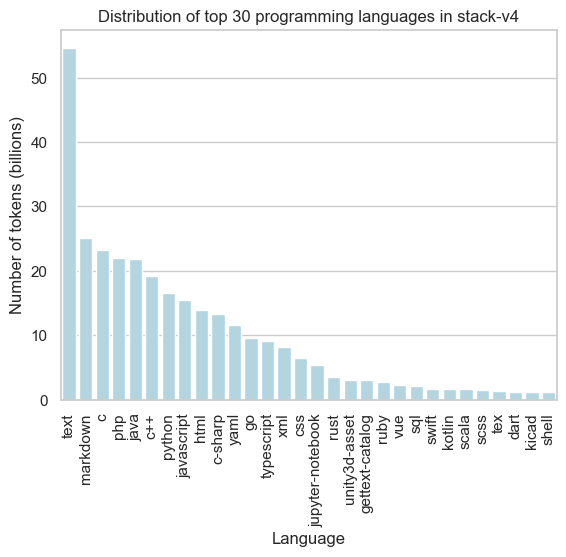

In [85]:
ax = sns.barplot(df, x="lang", y="tokens", estimator=sum, ci=None, color="lightblue")
ax.set(xlabel="Language", ylabel="Number of tokens (billions)")
ax.tick_params(axis='x', rotation=90)
ax.set_title("Distribution of top 30 programming languages in stack-v4")